# KNN


In [1]:
from sklearn.model_selection import train_test_split

from assignment_2.digits_classifiers.model import Dataset
from assignment_2.digits_classifiers.classifiers import NaiveBayes
from assignment_2.digits_classifiers.io import read_datasets

## Import dataset

In [2]:
data = read_datasets()

2022-12-22 18:42:48.189 | INFO     | assignment_2.digits_classifiers.io:read_datasets:46 - Reading datasets


In [3]:
X, y = data

## Train Test split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)

In [5]:
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
data = Dataset(x=X, y=y)
train = Dataset(x=X_train, y=y_train)
test = Dataset(x=X_test, y=y_test)

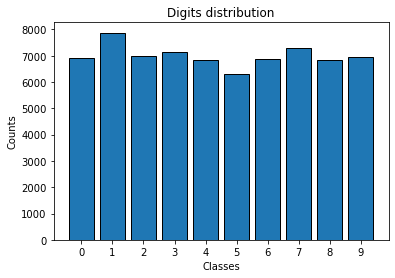

In [7]:
data.digit_distribution()

## Trial

In [8]:
nv = NaiveBayes(train=train, test=test)

In [9]:
nv.train()

C:\Users\user\Documents\GitHub\AI_assignments\assignment_2\digits_classifiers\classifiers.py:302: RuntimeWarning: invalid value encountered in double_scalars
  k = mean * (1-mean) / var - 1  # K = ( E[X] * (1 - E[X]) / Var[X] ) - 1


In [10]:
import numpy as np

row = np.array(X_test)[0, :]

In [11]:
y_test[0]

4

In [12]:
nv.estimator._label_product(l=7, x=row)

0.0

In [13]:
nv.estimator._labels_products(x=row)

[(1.413441922973321e-264, 0),
 (0.0, 1),
 (1.2235325782099119e-244, 2),
 (2.719269039611679e-293, 3),
 (2.630442753664519e-241, 4),
 (2.1948949977264542e-271, 5),
 (1.774656678073875e-278, 6),
 (0.0, 7),
 (6.579487267983029e-295, 8),
 (1.3659962354391215e-281, 9)]

In [14]:
nv.predict()

 > 0.000000
 > 0.428571
 > 0.857143
 > 1.285714
 > 1.714286
 > 2.142857


KeyboardInterrupt: 

In [ ]:
nv.accuracy

## Plotting the mean distribution

In [ ]:
from assignment_2.digits_classifiers.utils import chunks, plot_digit

for i in range(10):
    pixels = [np.array(np.array(X.loc[y==i]))[:, c].mean() for c in range(len(X.columns))]
    chunks_ = chunks(lst=pixels, n=28)
    plot_digit(pixels=chunks_, save=True, file_name=f"{i}_mean")

## Modelling bayes

In [ ]:
bc = NaiveBayes(train=train, test=test)

In [ ]:
%%time
bc.train()

In [ ]:
%%time
bc.predict()

In [ ]:
bc.accuracy

In [ ]:
bc.confusion_matrix()